In [1]:
!pip install neuralprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 113 kB 7.1 MB/s 
     |████████████████████████████████| 706 kB 46.3 MB/s 
     |████████████████████████████████| 419 kB 53.5 MB/s 
     |████████████████████████████████| 232 kB 53.5 MB/s 
     |████████████████████████████████| 1.4 MB 43.9 MB/s 
     |████████████████████████████████| 51 kB 5.8 MB/s 
     |████████████████████████████████| 1.6 MB 51.9 MB/s 


In [2]:
import pandas as pd
from neuralprophet import NeuralProphet
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_csv('austin_weather.csv')
df.tail()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
1314,2017-07-27,103,89,75,71,67,61,82,54,25,30.04,29.97,29.88,10,10,10,12,5,21,0,
1315,2017-07-28,105,91,76,71,64,55,87,54,20,29.97,29.9,29.81,10,10,10,14,5,20,0,
1316,2017-07-29,107,92,77,72,64,55,82,51,19,29.91,29.86,29.79,10,10,10,12,4,17,0,
1317,2017-07-30,106,93,79,70,68,63,69,48,27,29.96,29.91,29.87,10,10,10,13,4,20,0,
1318,2017-07-31,99,88,77,66,61,54,64,43,22,30.04,29.97,29.91,10,10,10,12,4,20,0,


In [ ]:
df.Date.unique()

array(['2013-12-21', '2013-12-22', '2013-12-23', ..., '2017-07-29',
       '2017-07-30', '2017-07-31'], dtype=object)

In [ ]:
df.columns

Index(['Date', 'TempHighF', 'TempAvgF', 'TempLowF', 'DewPointHighF',
       'DewPointAvgF', 'DewPointLowF', 'HumidityHighPercent',
       'HumidityAvgPercent', 'HumidityLowPercent',
       'SeaLevelPressureHighInches', 'SeaLevelPressureAvgInches',
       'SeaLevelPressureLowInches', 'VisibilityHighMiles',
       'VisibilityAvgMiles', 'VisibilityLowMiles', 'WindHighMPH', 'WindAvgMPH',
       'WindGustMPH', 'PrecipitationSumInches', 'Events'],
      dtype='object')

In [ ]:
df.dtypes

Date                          object
TempHighF                      int64
TempAvgF                       int64
TempLowF                       int64
DewPointHighF                 object
DewPointAvgF                  object
DewPointLowF                  object
HumidityHighPercent           object
HumidityAvgPercent            object
HumidityLowPercent            object
SeaLevelPressureHighInches    object
SeaLevelPressureAvgInches     object
SeaLevelPressureLowInches     object
VisibilityHighMiles           object
VisibilityAvgMiles            object
VisibilityLowMiles            object
WindHighMPH                   object
WindAvgMPH                    object
WindGustMPH                   object
PrecipitationSumInches        object
Events                        object
dtype: object

In [ ]:
df ['Date'] = pd.to_datetime(df ['Date'])
df.tail()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
1314,2017-07-27,103,89,75,71,67,61,82,54,25,30.04,29.97,29.88,10,10,10,12,5,21,0,
1315,2017-07-28,105,91,76,71,64,55,87,54,20,29.97,29.9,29.81,10,10,10,14,5,20,0,
1316,2017-07-29,107,92,77,72,64,55,82,51,19,29.91,29.86,29.79,10,10,10,12,4,17,0,
1317,2017-07-30,106,93,79,70,68,63,69,48,27,29.96,29.91,29.87,10,10,10,13,4,20,0,
1318,2017-07-31,99,88,77,66,61,54,64,43,22,30.04,29.97,29.91,10,10,10,12,4,20,0,


In [ ]:
df.dtypes

Date                          datetime64[ns]
TempHighF                              int64
TempAvgF                               int64
TempLowF                               int64
DewPointHighF                         object
DewPointAvgF                          object
DewPointLowF                          object
HumidityHighPercent                   object
HumidityAvgPercent                    object
HumidityLowPercent                    object
SeaLevelPressureHighInches            object
SeaLevelPressureAvgInches             object
SeaLevelPressureLowInches             object
VisibilityHighMiles                   object
VisibilityAvgMiles                    object
VisibilityLowMiles                    object
WindHighMPH                           object
WindAvgMPH                            object
WindGustMPH                           object
PrecipitationSumInches                object
Events                                object
dtype: object

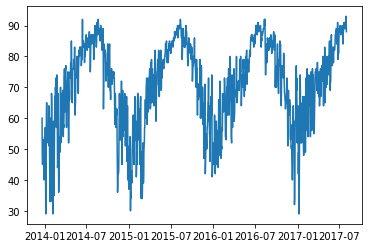

In [ ]:
plt.plot(df ['Date'], df ['TempAvgF'])
plt.show()

In [ ]:
new_column = df[['Date', 'TempAvgF']] 
new_column.dropna(inplace=True)
new_column.columns = ['ds', 'y'] 
new_column.tail()

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  



,ds,y
1314,2017-07-27,89
1315,2017-07-28,91
1316,2017-07-29,92
1317,2017-07-30,93
1318,2017-07-31,88


Training the forecasting model

In [ ]:
n = NeuralProphet()
model = n.fit(new_column, freq='D', epochs=5000)

INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32


  0%|          | 0/256 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.21E-02, min: 8.97E-01


  0%|          | 0/256 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.21E-02, min: 1.58E+00


  0%|          | 0/256 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.21E-02, min: 1.35E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 3.21E-02
Epoch[5000/5000]: 100%|██████████| 5000/5000 [06:42<00:00, 12.43it/s, SmoothL1Loss=0.00612, MAE=4.95, RMSE=6.55, RegLoss=0]


Forecasting the temperature

In [ ]:
future = n.make_future_dataframe(new_column, periods=1500)
forecast = n.predict(future)
forecast.tail()

,ds,y,yhat1,residual1,trend,season_yearly,season_weekly
1495,2021-09-04,None,90.049217,NaN,78.572083,11.651982,-0.174853
1496,2021-09-05,None,89.802658,NaN,78.575211,11.443000,-0.215561
1497,2021-09-06,None,89.812012,NaN,78.578339,11.237756,-0.004087
1498,2021-09-07,None,89.796158,NaN,78.581467,11.036929,0.177760
1499,2021-09-08,None,89.555595,NaN,78.584595,10.841104,0.129898


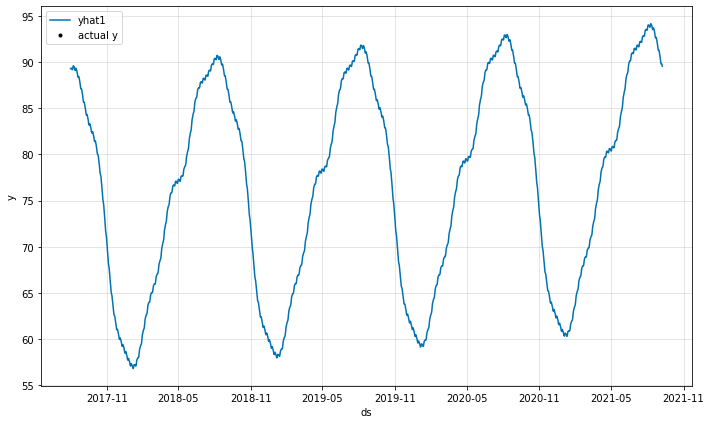

In [ ]:
plot = n.plot(forecast)